## Census data exploration

**Haley Karchmer**

For this assignment, I explored the *Ratio of Income to Poverty Level of Families in the Past 12 Months*. The number of persons within an income to poverty ratio category is provided. There are 7 categories, which range from under 0.50 to 2.00 and over. In general, a ratio less than 1 means that the income is less than the poverty level. When the ratio equals 1, the income and poverty level are the same, and when the ratio is greater than 1, the income is higher than the poverty level.

In [78]:
# for general data wrangling tasks
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt


load the data file

In [79]:
# load the data file
gdf = gpd.read_file('acs2019_5yr_C17002_14000US06037185320.geojson')

prelimiinary data inspection

In [80]:
# preliminary inspection
gdf.shape

(1005, 19)

In [81]:
gdf.head()

,geoid,name,C17002001,"C17002001, Error",C17002002,"C17002002, Error",C17002003,"C17002003, Error",C17002004,"C17002004, Error",C17002005,"C17002005, Error",C17002006,"C17002006, Error",C17002007,"C17002007, Error",C17002008,"C17002008, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4173.0,430.0,393.0,247.0,184.0,104.0,339.0,207.0,139.0,182.0,219.0,187.0,82.0,78.0,2817.0,416.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3379.0,331.0,86.0,56.0,44.0,41.0,111.0,166.0,33.0,46.0,51.0,51.0,117.0,91.0,2937.0,370.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6327.0,482.0,733.0,345.0,940.0,504.0,429.0,269.0,558.0,320.0,382.0,261.0,394.0,355.0,2891.0,551.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,182.0,135.0,403.0,203.0,409.0,235.0,191.0,126.0,283.0,189.0,110.0,79.0,2124.0,407.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3839.0,395.0,143.0,74.0,76.0,96.0,96.0,82.0,148.0,159.0,60.0,39.0,129.0,198.0,3187.0,447.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Look at the data types

In [31]:
# look at the data types
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             1005 non-null   object  
 1   name              1005 non-null   object  
 2   C17002001         1005 non-null   float64 
 3   C17002001, Error  1005 non-null   float64 
 4   C17002002         1005 non-null   float64 
 5   C17002002, Error  1005 non-null   float64 
 6   C17002003         1005 non-null   float64 
 7   C17002003, Error  1005 non-null   float64 
 8   C17002004         1005 non-null   float64 
 9   C17002004, Error  1005 non-null   float64 
 10  C17002005         1005 non-null   float64 
 11  C17002005, Error  1005 non-null   float64 
 12  C17002006         1005 non-null   float64 
 13  C17002006, Error  1005 non-null   float64 
 14  C17002007         1005 non-null   float64 
 15  C17002007, Error  1005 non-null   float64 
 16  C17002008       

Plot it, showing geo component of geopandas

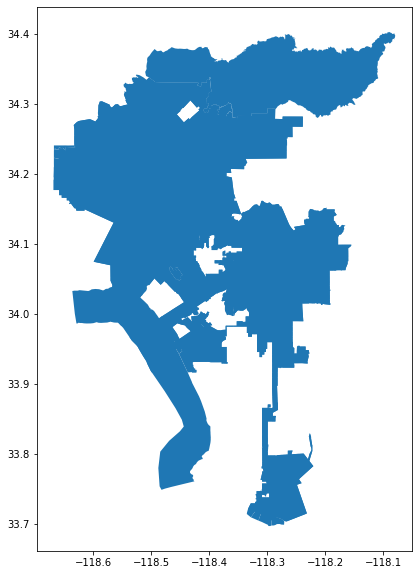

In [32]:
gdf.plot(figsize=(10,10))




Exmamine the FIPS code of the first 5 data entries

In [33]:
gdf.geoid.head()

0    14000US06037101110
1    14000US06037101122
2    14000US06037101210
3    14000US06037101220
4    14000US06037101300
Name: geoid, dtype: object

See complete list of columns

In [34]:
# create a list of column names as they are now
list(gdf) 

['geoid',
 'name',
 'C17002001',
 'C17002001, Error',
 'C17002002',
 'C17002002, Error',
 'C17002003',
 'C17002003, Error',
 'C17002004',
 'C17002004, Error',
 'C17002005',
 'C17002005, Error',
 'C17002006',
 'C17002006, Error',
 'C17002007',
 'C17002007, Error',
 'C17002008',
 'C17002008, Error',
 'geometry']

Rename the columns

In [35]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Total, Error',
 'Under .50',
 'Under .50, Error',
 '.50 to .99',
 '.50 to .99, Error',
 '1.00 to 1.24',
 '1.00 to 1.24, Error',
 '1.25 to 1.49',
 '1.25 to 1.49, Error',             
 '1.50 to 1.84',
 '1.50 to 1.84, Error',  
 '1.85 to 1.99',
 '1.85 to 1.99, Error',
 '2.00 and over',
 '2.00 and over, Error',            
 'geometry'] 

In [36]:
gdf.head()

,geoid,name,Total,"Total, Error",Under .50,"Under .50, Error",.50 to .99,".50 to .99, Error",1.00 to 1.24,"1.00 to 1.24, Error",1.25 to 1.49,"1.25 to 1.49, Error",1.50 to 1.84,"1.50 to 1.84, Error",1.85 to 1.99,"1.85 to 1.99, Error",2.00 and over,"2.00 and over, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4173.0,430.0,393.0,247.0,184.0,104.0,339.0,207.0,139.0,182.0,219.0,187.0,82.0,78.0,2817.0,416.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3379.0,331.0,86.0,56.0,44.0,41.0,111.0,166.0,33.0,46.0,51.0,51.0,117.0,91.0,2937.0,370.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6327.0,482.0,733.0,345.0,940.0,504.0,429.0,269.0,558.0,320.0,382.0,261.0,394.0,355.0,2891.0,551.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,182.0,135.0,403.0,203.0,409.0,235.0,191.0,126.0,283.0,189.0,110.0,79.0,2124.0,407.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
4,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3839.0,395.0,143.0,74.0,76.0,96.0,96.0,82.0,148.0,159.0,60.0,39.0,129.0,198.0,3187.0,447.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


double check data integrity

In [37]:
random_tract = gdf.sample()
random_tract

,geoid,name,Total,"Total, Error",Under .50,"Under .50, Error",.50 to .99,".50 to .99, Error",1.00 to 1.24,"1.00 to 1.24, Error",1.25 to 1.49,"1.25 to 1.49, Error",1.50 to 1.84,"1.50 to 1.84, Error",1.85 to 1.99,"1.85 to 1.99, Error",2.00 and over,"2.00 and over, Error",geometry
395,14000US06037188201,"Census Tract 1882.01, Los Angeles, CA",3464.0,278.0,203.0,127.0,110.0,72.0,33.0,24.0,134.0,106.0,125.0,75.0,23.0,20.0,2836.0,322.0,"MULTIPOLYGON (((-118.28524 34.11230, -118.2841..."


In [38]:
# example usage of iloc 
random_tract.iloc[0]['Under .50']

203.0

What are the census tracts with the highest population?

In [39]:
gdf_sorted = gdf.sort_values(by='Total',ascending = False)

display the data, but just a few columns to keep it clean

In [40]:
gdf_sorted[['geoid','Total']].head(8)

,geoid,Total
1004,16000US0644000,3896313.0
922,14000US06037275602,12017.0
84,14000US06037111400,8657.0
128,14000US06037119002,7907.0
263,14000US06037132300,7862.0
82,14000US06037111301,7540.0
547,14000US06037208000,7508.0
301,14000US06037135203,7497.0


drop the row with the index [1004] It is not a ceensus tract

In [41]:
gdf_sorted = gdf_sorted.drop([1004])

In [42]:
gdf_sorted.head()

,geoid,name,Total,"Total, Error",Under .50,"Under .50, Error",.50 to .99,".50 to .99, Error",1.00 to 1.24,"1.00 to 1.24, Error",1.25 to 1.49,"1.25 to 1.49, Error",1.50 to 1.84,"1.50 to 1.84, Error",1.85 to 1.99,"1.85 to 1.99, Error",2.00 and over,"2.00 and over, Error",geometry
922,14000US06037275602,"Census Tract 2756.02, Los Angeles, CA",12017.0,840.0,1116.0,528.0,136.0,93.0,68.0,68.0,41.0,63.0,141.0,148.0,52.0,60.0,10463.0,869.0,"MULTIPOLYGON (((-118.43226 33.97502, -118.4292..."
84,14000US06037111400,"Census Tract 1114, Los Angeles, CA",8657.0,535.0,734.0,370.0,720.0,373.0,85.0,107.0,443.0,323.0,797.0,658.0,268.0,322.0,5610.0,856.0,"MULTIPOLYGON (((-118.50240 34.25117, -118.5023..."
128,14000US06037119002,"Census Tract 1190.02, Los Angeles, CA",7907.0,652.0,217.0,140.0,286.0,147.0,374.0,250.0,448.0,249.0,544.0,330.0,139.0,137.0,5899.0,760.0,"MULTIPOLYGON (((-118.44012 34.25295, -118.4386..."
263,14000US06037132300,"Census Tract 1323, Los Angeles, CA",7862.0,733.0,374.0,382.0,1158.0,565.0,546.0,439.0,489.0,423.0,577.0,387.0,345.0,283.0,4373.0,835.0,"MULTIPOLYGON (((-118.53605 34.20106, -118.5347..."
82,14000US06037111301,"Census Tract 1113.01, Los Angeles, CA",7540.0,948.0,563.0,364.0,313.0,201.0,267.0,268.0,543.0,368.0,511.0,409.0,500.0,424.0,4843.0,884.0,"MULTIPOLYGON (((-118.52949 34.25736, -118.5294..."


plot a histogram of the households whose ratio of income to poverty level is between .50 and .99 (with 50 bins)

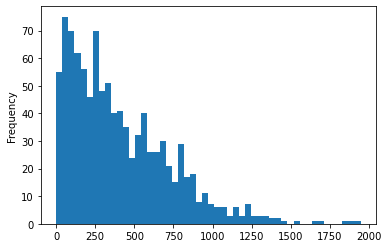

In [43]:
gdf_sorted['.50 to .99'].plot.hist(bins=50)

plot it

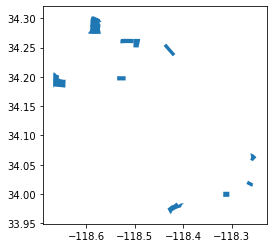

In [66]:
gdf_sorted.head(10).plot()

Normalize the data

In [67]:
# output the columns
list(gdf)

['geoid',
 'name',
 'Total',
 'Total, Error',
 'Under .50',
 'Under .50, Error',
 '.50 to .99',
 '.50 to .99, Error',
 '1.00 to 1.24',
 '1.00 to 1.24, Error',
 '1.25 to 1.49',
 '1.25 to 1.49, Error',
 '1.50 to 1.84',
 '1.50 to 1.84, Error',
 '1.85 to 1.99',
 '1.85 to 1.99, Error',
 '2.00 and over',
 '2.00 and over, Error',
 'geometry',
 'Percent Under .50',
 'Perecent 1.00 to 1.24',
 'Perecent 2.00 and over']

create a new column, and populate it with normalized data to get the percent of total value

In [71]:
gdf['Percent Under .50'] = gdf['Under .50']/gdf_sorted['Total']*100

In [72]:
gdf_sorted.sample(5)

,geoid,name,Total,"Total, Error",Under .50,"Under .50, Error",.50 to .99,".50 to .99, Error",1.00 to 1.24,"1.00 to 1.24, Error",...,1.50 to 1.84,"1.50 to 1.84, Error",1.85 to 1.99,"1.85 to 1.99, Error",2.00 and over,"2.00 and over, Error",geometry,Percent Under .50,Perecent .50 to .99,Perecent 1.00 to 1.24
570,14000US06037209403,"Census Tract 2094.03, Los Angeles, CA",4009.0,520.0,439.0,152.0,795.0,282.0,471.0,269.0,...,594.0,260.0,57.0,55.0,1209.0,589.0,"MULTIPOLYGON (((-118.27557 34.05386, -118.2745...",10.950362,19.830382,11.748566
540,14000US06037207301,"Census Tract 2073.01, Los Angeles, CA",4911.0,363.0,586.0,206.0,593.0,258.0,313.0,179.0,...,170.0,136.0,44.0,69.0,3073.0,431.0,"MULTIPOLYGON (((-118.25713 34.04302, -118.2557...",11.932397,12.074934,6.373447
629,14000US06037214700,"Census Tract 2147, Los Angeles, CA",2331.0,243.0,126.0,75.0,58.0,43.0,52.0,57.0,...,64.0,45.0,54.0,63.0,1921.0,241.0,"MULTIPOLYGON (((-118.37131 34.06465, -118.3712...",5.405405,2.488202,2.230802
876,14000US06037269602,"Census Tract 2696.02, Los Angeles, CA",2783.0,341.0,149.0,88.0,312.0,171.0,118.0,112.0,...,155.0,107.0,0.0,12.0,1712.0,265.0,"MULTIPOLYGON (((-118.38730 34.04228, -118.3865...",5.353935,11.210923,4.240029
641,14000US06037216800,"Census Tract 2168, Los Angeles, CA",3203.0,293.0,72.0,52.0,59.0,50.0,74.0,83.0,...,269.0,223.0,70.0,46.0,2516.0,312.0,"MULTIPOLYGON (((-118.37618 34.05703, -118.3761...",2.247893,1.842023,2.310334


create Chloropleth map

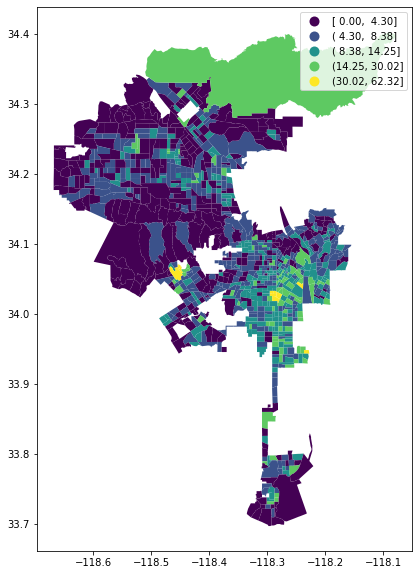

In [60]:
gdf.plot(figsize=(12,10),
                 column='Percent Under .50',
                 legend=True, 
                 scheme='NaturalBreaks')

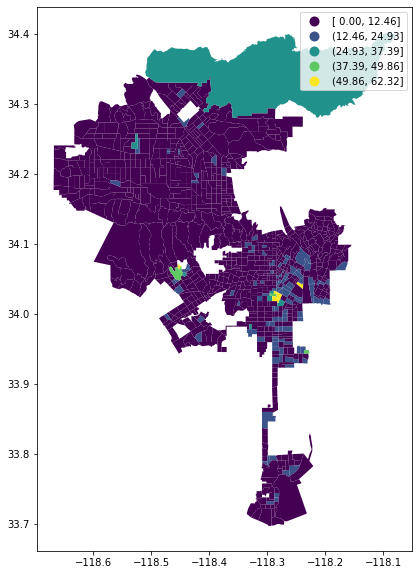

In [74]:
gdf_sorted.plot(figsize=(12,10),
                 column='Percent Under .50',
                 legend=True, 
                 scheme='equal_interval')

Add a basemap

In [75]:
# reproject to Web Mercator
gdf_web_mercator = gdf.to_crs(epsg=3857)

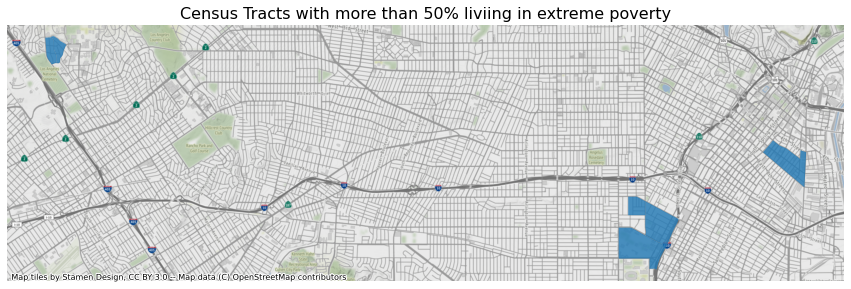

In [77]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(15, 15))

# add the layer with ax=ax in the argument 
gdf_web_mercator[gdf_web_mercator['Percent Under .50'] > 50].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 50% liviing in extreme poverty',fontsize=16)

# add a basemap
ctx.add_basemap(ax)